In [1]:
!pip install yfinance



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())


          Date        Open        High         Low       Close   Adj Close  \
245 2023-11-17  137.820007  138.000000  135.479996  136.940002  136.940002   
246 2023-11-20  135.500000  138.425003  135.490005  137.919998  137.919998   
247 2023-11-21  137.940002  138.964996  137.705002  138.619995  138.619995   
248 2023-11-22  139.100006  141.100006  139.000000  140.020004  140.020004   
249 2023-11-24  139.539993  139.677002  137.470001  138.220001  138.220001   

       Volume  
245  25565300  
246  19569400  
247  17648100  
248  17306400  
249   8828600  


In [3]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-11-28   96.250000
1 2022-11-29   95.440002
2 2022-11-30  101.449997
3 2022-12-01  101.279999
4 2022-12-02  100.830002


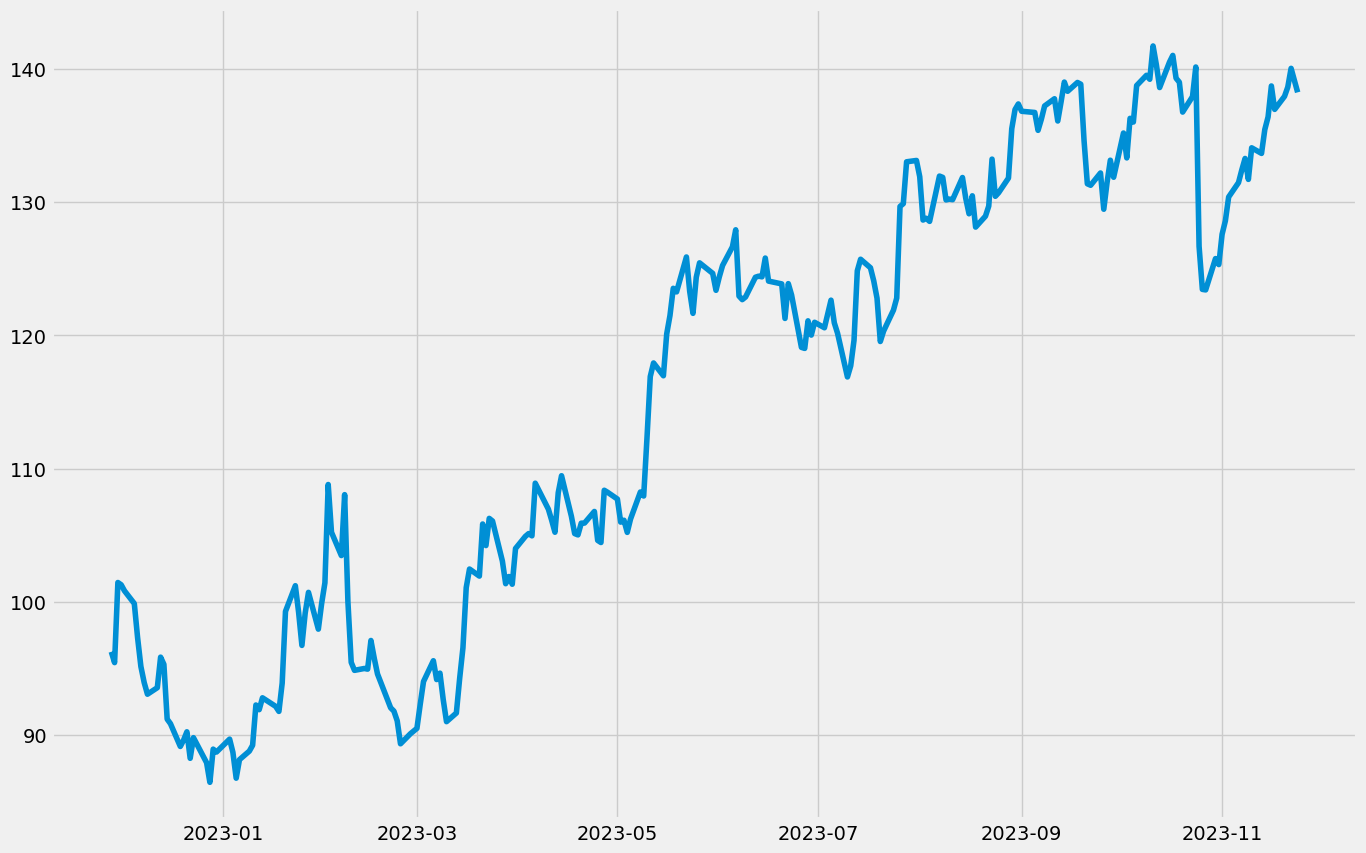

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

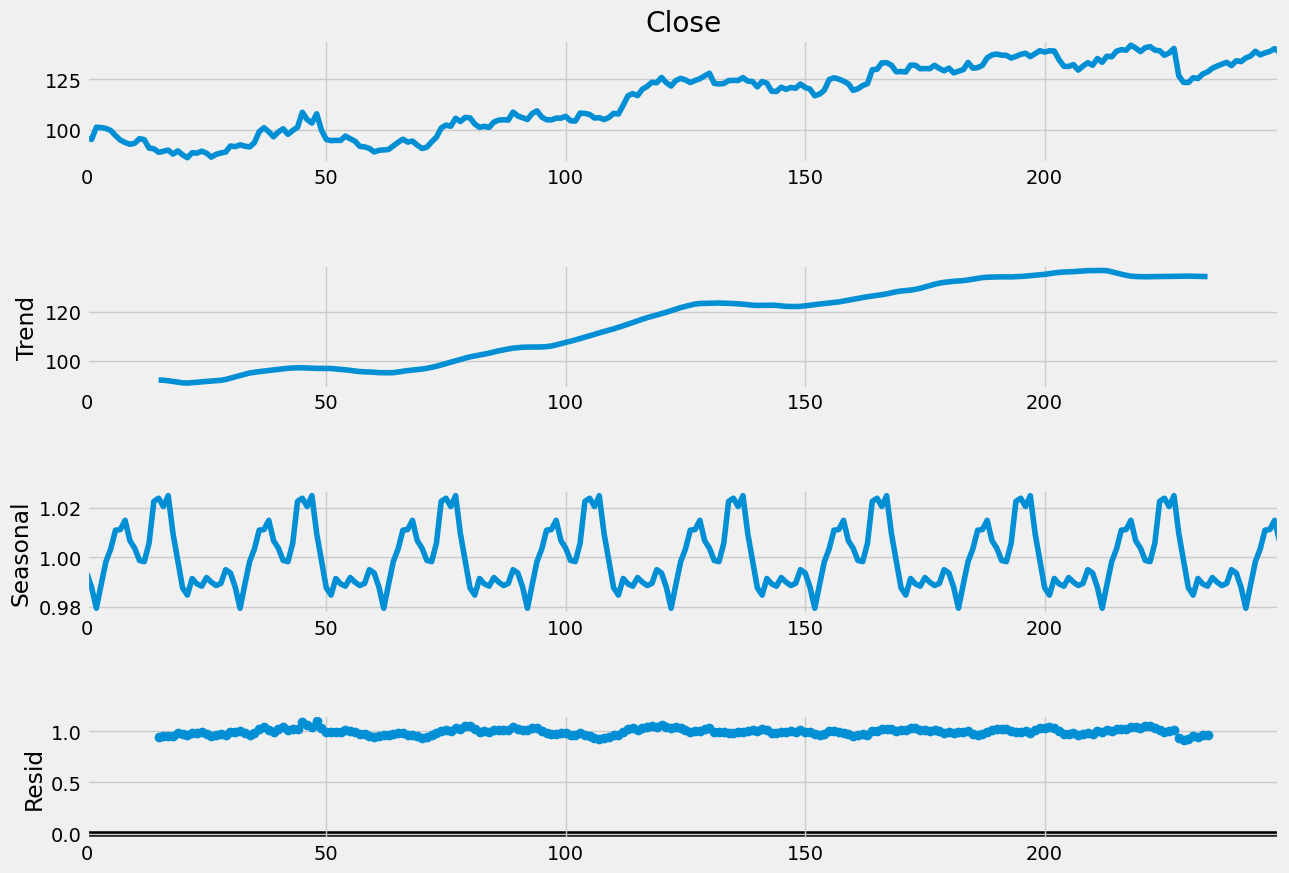

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

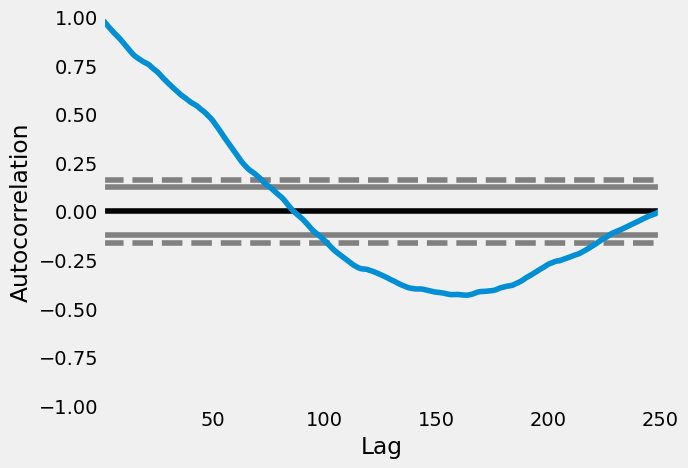

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\91999\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


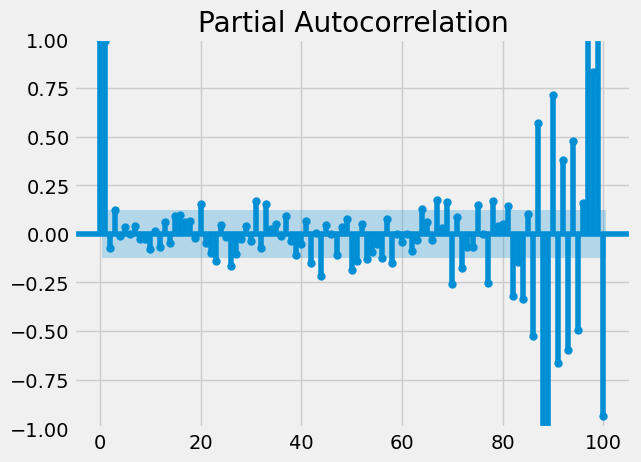

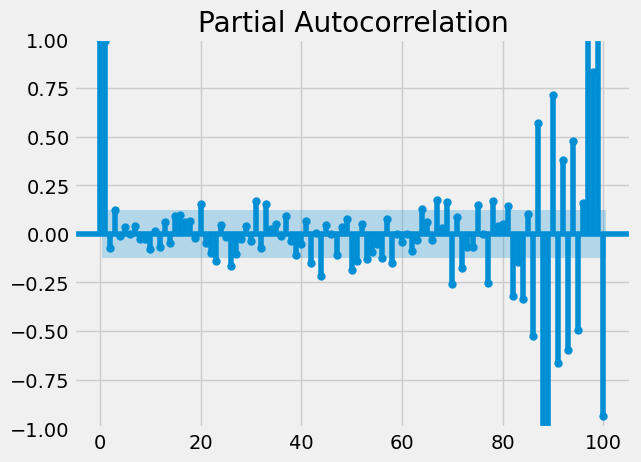

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [10]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
import statsmodels
model = ARIMA(data["Close"], order=(p,d,q))  

# Check if the disp argument is available
if int(statsmodels.__version__.split('.')[1]) >= 12:
    fitted = model.fit()
else:
    fitted = model.fit(disp=-1)
 
print(fitted.summary())

C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -550.141
Date:                Sun, 26 Nov 2023   AIC                           1116.282
Time:                        00:44:49   BIC                           1144.422
Sample:                             0   HQIC                          1127.609
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4436      0.070     20.684      0.000       1.307       1.580
ar.L2         -1.0272      0.116     -8.819      0.000      -1.256      -0.799
ar.L3          0.0847      0.139      0.610      0.5

C:\Users\91999\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       96.250017
2       95.412115
3      101.697373
4      101.039611
          ...    
245    138.332612
246    136.278154
247    137.494361
248    138.301226
249    140.116541
Name: predicted_mean, Length: 250, dtype: float64


In [12]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91999\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -538.906
Date:                            Sun, 26 Nov 2023   AIC                           1107.812
Time:                                    00:46:41   BIC                           1159.833
Sample:                                         0   HQIC                          1128.780
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4656      0.085     17.202      0.000       1.299       1.633
ar.L2         -1.0600      0.143   

In [13]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    138.787361
251    139.136415
252    139.622943
253    138.713708
254    138.641024
255    138.091652
256    138.825192
257    139.474372
258    139.689062
259    140.725146
260    142.014963
Name: predicted_mean, dtype: float64


<AxesSubplot:>

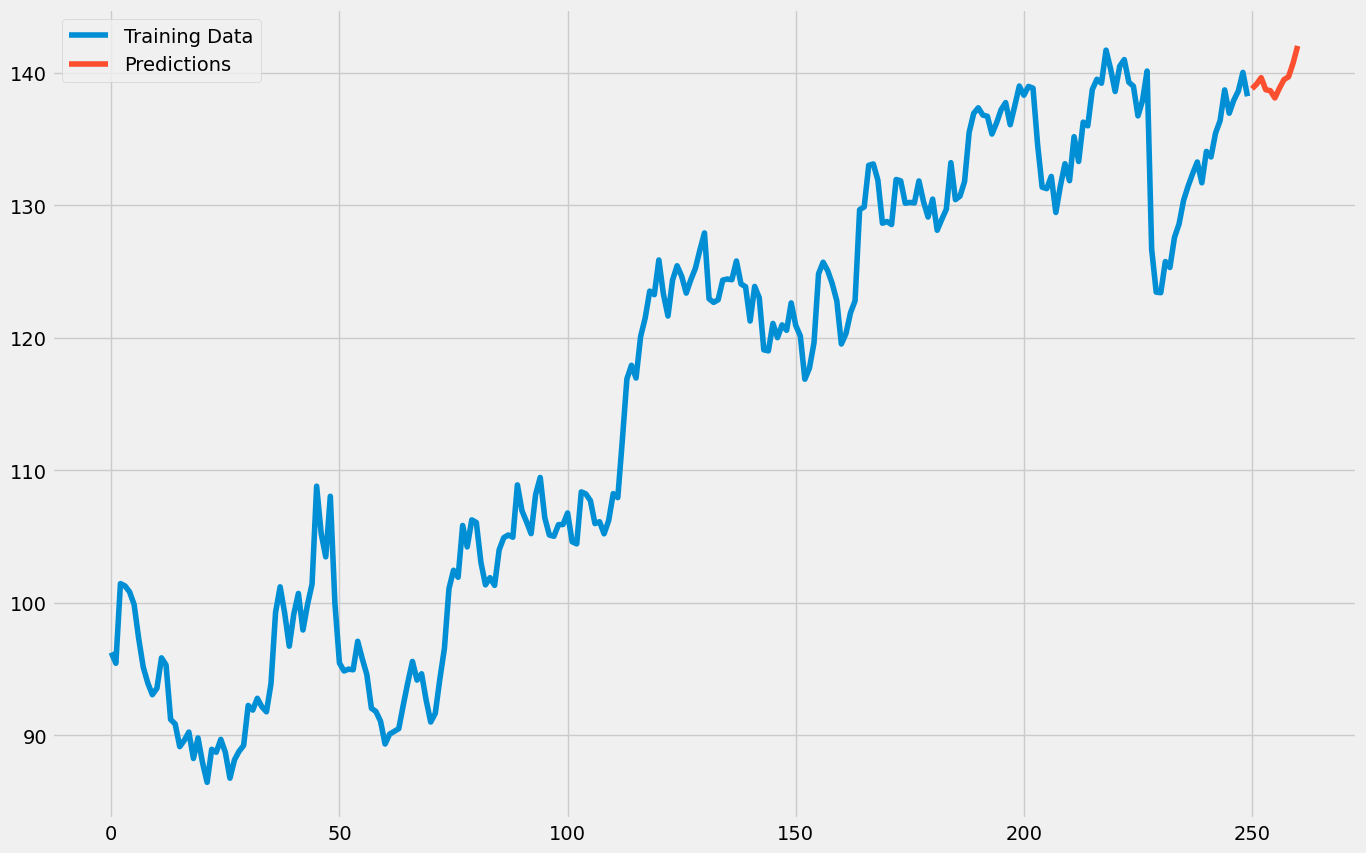

In [14]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")